In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
# Set the vocabulary size
vocab_size = 10000

# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 25000
Testing samples: 25000


In [3]:
# Set the max review length
maxlen = 500

# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train, maxlen=maxlen)
X_test_padded = pad_sequences(X_test, maxlen=maxlen)

In [4]:
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen))

# Simple RNN Layer
model.add(SimpleRNN(units=32))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 139ms/step - accuracy: 0.5947 - loss: 0.6472 - val_accuracy: 0.7546 - val_loss: 0.5180
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 134ms/step - accuracy: 0.8511 - loss: 0.3694 - val_accuracy: 0.8308 - val_loss: 0.3888
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.9046 - loss: 0.2494 - val_accuracy: 0.8370 - val_loss: 0.4093
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.9490 - loss: 0.1487 - val_accuracy: 0.8220 - val_loss: 0.4741
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9602 - loss: 0.1229 - val_accuracy: 0.8268 - val_loss: 0.5279


In [7]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8289 - loss: 0.5118
Test Accuracy: 0.8282399773597717


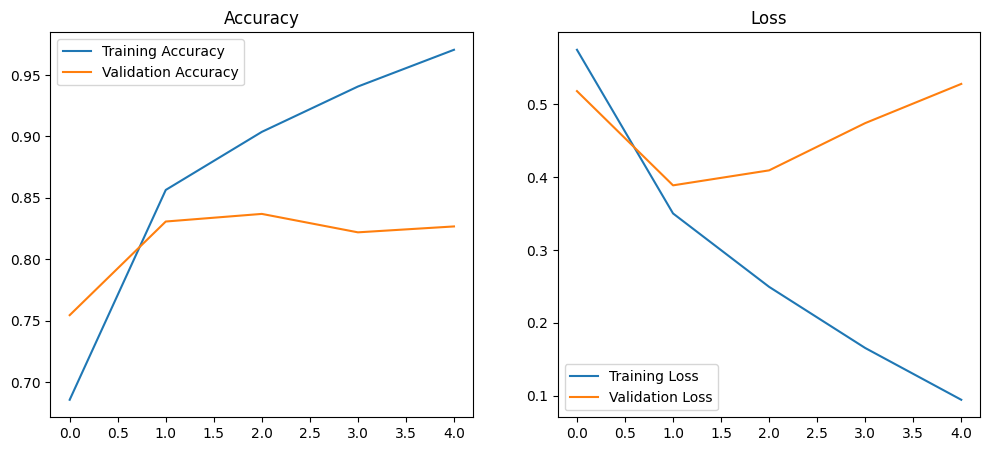

In [8]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()